# Exploratory Data Analysis for Automobile Data

### 1. Import Libraries and Load Data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# load and store data
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
# Install seaborn
! pip install seaborn

In [4]:
# Import Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Analyse Individual Feature Patterns using Visualization

#### Choosing the right visualization method:
To find the appropriate visualization method for individual variables, it is important to first understand the type of variable you are working with. This will help us find the right visualization method for that variable.

In [5]:
# list the data types for each column
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


##### Exercise 1:

What is the data type of the column "city-mpg"?

##### Solution 1:

Int 64

### Continuous numerical variables:
Continuous numerical variables are variables that may contain any value within some range.
Continuous numerical variables can have the type "int64" or "float64". A great way to visualize
these variables is by using scatterplots with fitted lines.

For example, to understand the (linear) relationship between an individual variable and the
price, a "regplot" which plots the scatterplot plus the fitted regression line
for the data can be used.

Let's see several examples of different linear relationships:

#### Positive linear Relationship

(0.0, 53185.83427754941)

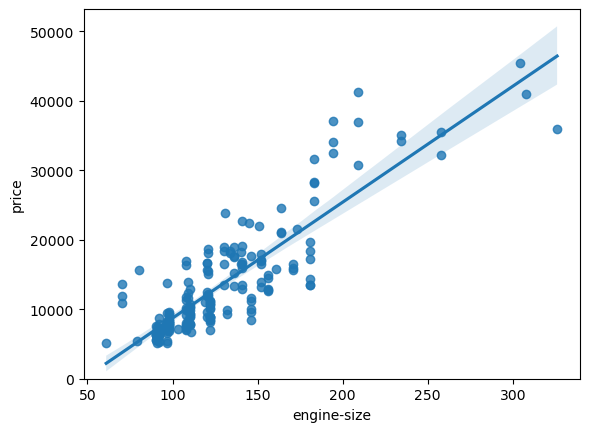

In [8]:
# To plot the scatterplot of "engine-size" and "price"
# Engine size as potential predictor variable of price
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

#### Explanation

As the engine-size goes up, the price goes up. This indicates a positive direct correlation between
these two variables. Engine size seems like a pretty good predictor of price since the regression
line is almost a perfect diagonal line.

We can further examine the correlation between "engine-size" and "price" and see it is approximately 0.87

In [9]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


#### Negative linear Relationship

(0.0, 48191.45730526294)

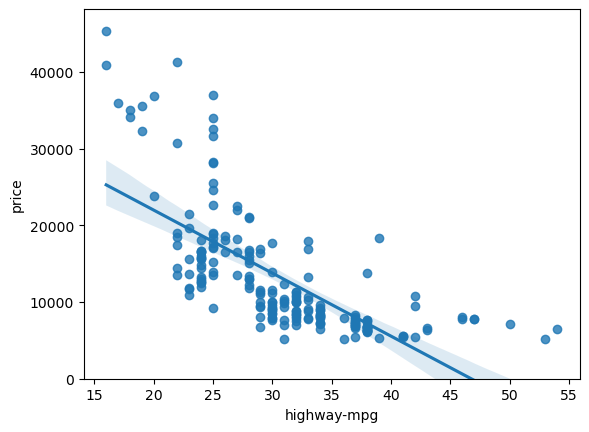

In [10]:
# To plot the scatterplot of "highway-mpg" and "price"
# Highway-mpg as potential predictor variable of price
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

#### Explanation

As the highway-mpg goes up, the price goes down. This indicates an inverse/negative
relationship between these two variables. Highway mpg could potentially be a predictor of price. 

We can further examine the correlation between "highway-mpg" and "price" and see it is approximately 0.704

In [11]:
df[["highway-mpg", "price"]].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


#### Weak linear Relationship

(0.0, 47414.1)

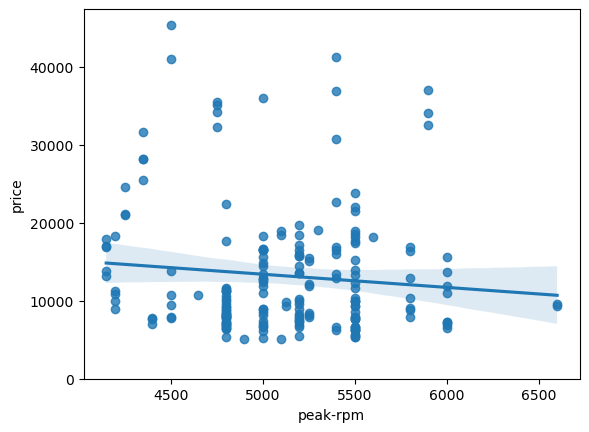

In [12]:
# To check if "peak-rpm" potential predictor variable of "price"
# Plot the scatterplot of "peak-rpm" and "price"

sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

#### Explanation

Peak rpm does not seem like a good predictor of the price at all since the regression line is close
to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of
variability. Therefore, it is not a reliable variable. 

We can further examine the correlation between "peak-rpm" and "price" and see it is approximately 0.101616.

In [13]:
df[["peak-rpm", "price"]].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


##### Exercise 2a:
Find the correlation between "stroke" and "price".

##### Solution 2a:

In [14]:
df[['stroke', 'price']].corr()

,stroke,price
stroke,1.00000,0.08231
price,0.08231,1.00000


#### Explanation

Recall that the closer to 1 a correllation value is, the stronger the variable is as a predicator of a feature. In this case, the value of 0.0823 shows a weak correllation between "stroke" and "price".

##### Exercise 2b:

Given the correlation results between "stroke" and "price", do you expect a linear relationship?

##### Solution 2b:

(0.0, 47414.1)

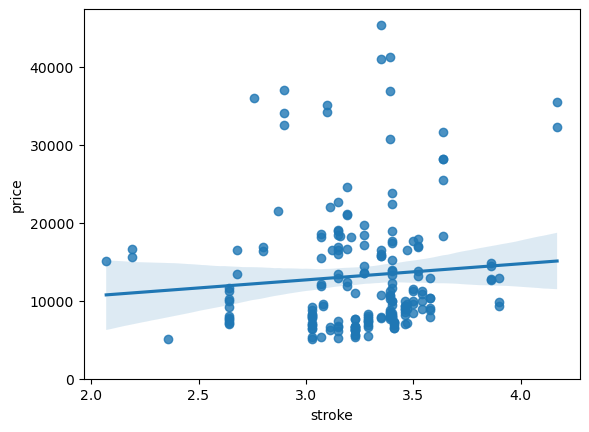

In [15]:
# Plot the scatterplot of "stroke" and "price"

sns.regplot(x="stroke", y="price", data=df)
plt.ylim(0,)

#### Explanation

Stroke does not seem like a good predictor of the price because the regression line is close
to horizontal which means that the price experiences little or no change with respect to stroke. Also, the data points are very scattered and far from the fitted line, showing lots of
variability. Therefore, it is not a reliable variable. 

### Categorical variables:

These are variables that describe a characteristic of a data unit, and are selected from a small
group of categories. The categorical variables can have the type "object" or "int64". A good way
to visualize categorical variables is by using boxplots.

<Axes: xlabel='body-style', ylabel='price'>

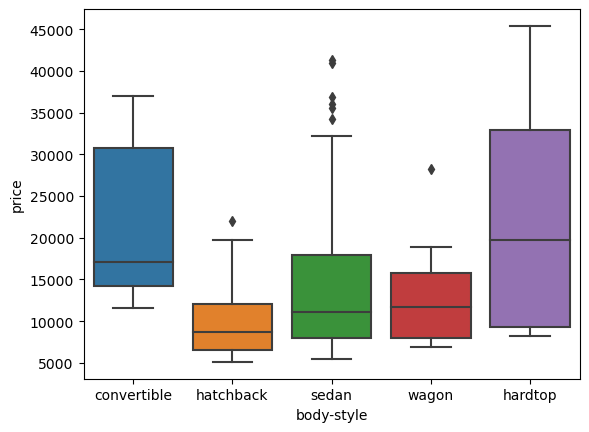

In [16]:
# "body-style" and "price" relationship
sns.boxplot(x="body-style", y="price", data=df)

#### Verdict:

Price distribution overlaps between the body styles; therefore, this is not a good price predictor.

<Axes: xlabel='engine-location', ylabel='price'>

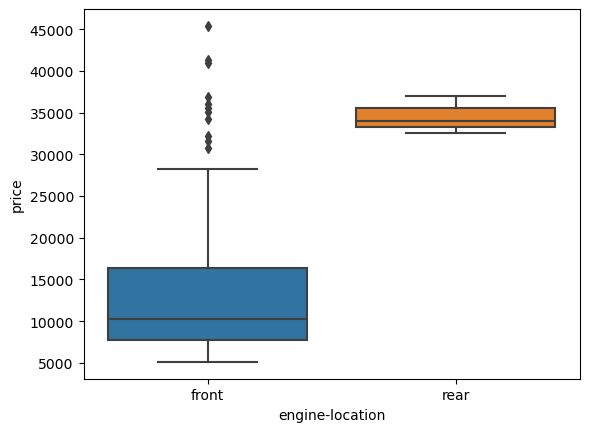

In [17]:
# "engine-location" and "price" relationship
sns.boxplot(x="engine-location", y="price", data=df)

#### Verdict:

The price distribution between the two engine-location categories are distinct enough to use the engine-location as a potential good predictor of price.

<Axes: xlabel='drive-wheels', ylabel='price'>

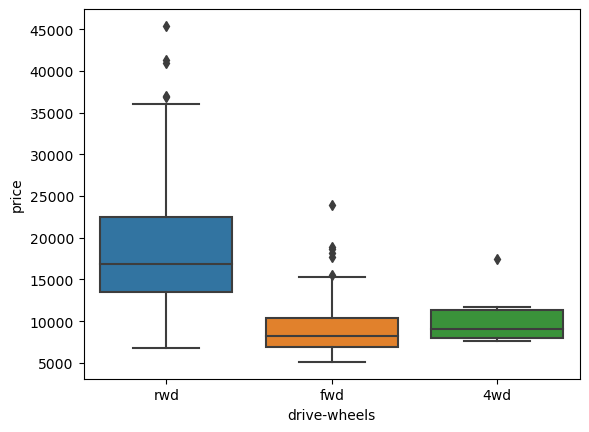

In [18]:
# "drive-wheels" and "price" relationship
sns.boxplot(x="drive-wheels", y="price", data=df)

#### Verdict:

There are differences in price distribution between the drive-wheels categories; therefore, drive-wheels could potentially be a predictor of price.

### 3. Descriptive Statistical Analysis

#### 'Describe' Function:

The describe function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.

This will show the following:
-  The count of that variable; 
-  The mean; 
-  The standard deviation (std); 
-  The minimum value; 
-  The IQR (Interquartile Range: 25%, 50% and 75%); and 
-  The maximum value

In [19]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [20]:
# to return only non-numeric data

df.describe(include=['object'])

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


#### Value Counts

Value-counts is a good way of understanding how many units of each characteristic/variable is contained in the dataset. For example, we can apply the "value-counts" method on the column 'drive-wheels'. It is important to note that "value-counts" only works on Pandas series, and not on Pandas Dataframes. As a result, we
only include one bracket "df['drive-wheels']" not two brackets "df[['drive-wheels']]".

In [21]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [22]:
# Convert Series to dataframe
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


Now, let's repeat the above steps but save the results to the dataframe "drive_wheels_counts" and rename the column 'drive-wheels' to 'value_counts'.

In [23]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


In [24]:
# Rename the index to 'drive-wheels':
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [25]:
# Repeat process for the variable 'engine-location'.
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,value_counts
engine-location,
front,198
rear,3


##### Verdict:
The value counts of the engine location would not be a good predictor variable for the price. This is because there are only three cars with a rear engine and 198 with an engine in the front, thus the result is skewed. Therefore, we are unable to draw any conclusions about the engine location.

### 4. Basics of Grouping

The "groupby" method groups data by different categories. The data is grouped based on one or several variables and analysis is performed on the individual groups.
For example, if we group by the variable "drive-wheels", we see that there are 3 different categories of drive wheels.

In [26]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

If we want to know, on average, which type of drive wheel is most valuable, we can group "drive-wheels" and then average them.

First, we select the columns 'drive-wheels', 'body-style' and 'price', then assign it to the variable "df_group_one".
Then, we calculate the average price for each of the different categories of data.

In [28]:
# Select the columns 'drive-wheels', 'body-style' and 'price', then assign it to the variable "df_group_one"
df_group_one = df[['drive-wheels','body-style','price']]

In [29]:
# Calculate the average price for each of the different categories of data
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

C:\Users\olanr\AppData\Local\Temp\ipykernel_22696\2120333557.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()


,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


##### Verdict: 

It appears that rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel drive and front-wheel drive are approximately the same in price.

The 'group-by' function can also be applied to multiple variables. 

For example, we can group by 'drive-wheels' and 'body-style', and store . This groups the dataframe by the unique combinations 'drive-wheels' and 'body-style'. We can store the results in the variable 'grouped_set1'.

In [30]:
# Grouping results
df_gptest = df[['drive-wheels','body-style','price']]
grouped_set1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_set1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


This grouped data is much easier to visualize when it is made into a pivot table. A pivot table is like an Excel spreadsheet, with one variable along the column and another along the row. We can convert the dataframe to a pivot table using the method "pivot " to create a pivot table from the groups.

In this case, the drive-wheel variable will serve as the rows of the table, and pivot body-style to become the columns of the table:

In [31]:
grouped_pivot = grouped_set1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

Often, we won't have data for some of the pivot cells. These missing values can be replaced with the value 0, but any other value could potentially be used as well. 

In [32]:
# Replace missing data with '0'
grouped_pivot = grouped_pivot.fillna(0) 
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

##### Exercise 3:

Use the "groupby" function to find the average "price" of each car based on "body-style" ?

##### Solution 3:

In [33]:
# grouping results
df_gptest2 = df[['body-style','price']]
grouped_set_bodystyle = df_gptest2.groupby(['body-style'],as_index= False).mean()
grouped_set_bodystyle

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


##### Heat Map
 A heatmap can help visualize how a target variable is related to a feature or set of features. The heatmap plots the target variable (price) proportional to colour with respect to the variables 'drive-wheel' and 'body-style' in the vertical and horizontal axis respectively. 

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

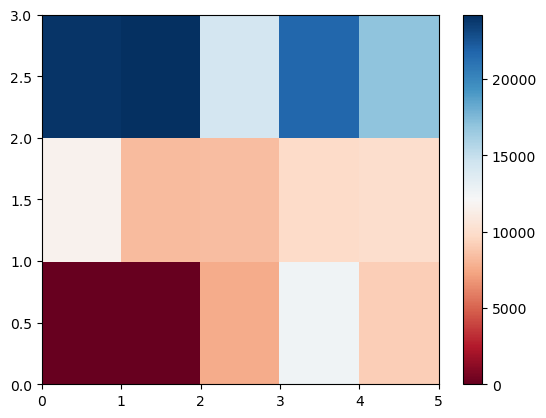

In [35]:
# Use heat map to visualize the relationship between Body Style vs Price.
# Use the grouped results
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

The heat map above comes with default labels which convey no useful information. Let's change that:

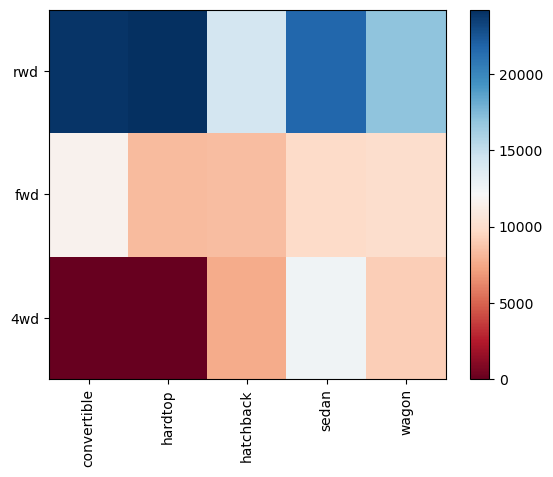

In [37]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

At this point, one might wonder : "What are the main characteristics which have the most impact on the car price?".

To get a better measure of the important characteristics, we look at the correlation of these variables with the car price, in other words: how much is the price of a car dependent on this variable?

### 5. Correlation and Causation

__Correlation:__ This is a measure of the extent of interdependence between variables.

__Causation:__ This is the relationship between cause and effect between two variables.
It is important to know the difference between these two and that correlation does not imply causation. Determining correlation is much simpler the determining causation as causation may require independent experimentation.

### Pairwise Correllation

Pairwise correlation is a measure of the linear relationship between two variables. It can be computed between rows or columns of data frames or matrices. It is often used to detect highly correlated features which only add to model complexity, increase the chance of overfitting, and require more computations, and therefore, such features should be dropped. Pairwise correllation can be plotted either as table or an image.

In [6]:
#Pairwise correllation

df.corr()

C:\Users\olanr\AppData\Local\Temp\ipykernel_22696\3258491215.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


##### Exercise 4:
What is the correllation between the following : bore, stroke, compression-ratio and horsepower?

##### Solution 4:

In [7]:
df[['bore', 'stroke' ,'compression-ratio', 'horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


### Pearson Correllation

The Pearson Correlation measures the linear dependence between two variables X and Y. The resulting coefficient is a value between -1 and 1 inclusive, where:

-  1: Total positive linear correlation.
-  0: No linear correlation, the two variables most likely do not affect each other.
-  -1: Total negative linear correlation.

Pearson Correlation is the default method of the function "corr". Like pairwise correllation, we can calculate the Pearson Correlation of the 'int64' or 'float64' variables.

Sometimes we would like to know the significance of the correlation estimate. The P-value helps to determine this.

__P-value:__ 

The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.

By convention, when

-  p-value is << 0.001: we say there is strong evidence that the correlation is significant.
-  the p-value is << 0.05: there is moderate evidence that the correlation is significant.
-  the p-value is << 0.1: there is weak evidence that the correlation is significant.
-  the p-value is >> 0.1: there is no evidence that the correlation is significant.

We can obtain this information using "stats" module in the "scipy" library.


In [39]:
from scipy import stats

__Wheel-base vs Price__

To calculate the Pearson Correlation Coefficient and P-value of 'wheel-base' and 'price'. 

In [40]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.5846418222655083  with a P-value of P = 8.076488270732873e-20


##### Verdict:

Since the p-value is < < 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship is not extremely strong (~0.585).

__Horsepower vs Price__

To calculate the Pearson Correlation Coefficient and P-value of 'horsepower' and 'price'. 

In [41]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.8095745670036555  with a P-value of P = 6.369057428261186e-48


##### Verdict:

Since the p-value is < < 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1).

__Length vs Price__

To calculate the Pearson Correlation Coefficient and P-value of 'length' and 'price'. 

In [42]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.6906283804483644  with a P-value of P =  8.016477466158188e-30


##### Verdict:

Since the p-value is < < 0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).

__Width vs Price__

In [43]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value )

The Pearson Correlation Coefficient is 0.7512653440522665  with a P-value of P = 9.200335510484131e-38


##### Verdict:

Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.751).

__Curb-weight vs Price__

In [44]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8344145257702849  with a P-value of P =  2.1895772388933803e-53


##### Verdict:

Since the p-value is < < 0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834).

__Engine-size vs price__

In [45]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.265491622198389e-64


##### Verdict:

Since the p-value is < < 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).

__Bore vs Price__

In [46]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value )

The Pearson Correlation Coefficient is 0.5431553832626604  with a P-value of P =   8.049189483935032e-17


##### Verdict:

Since the p-value is < < 0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.521).

__City-mpg vs Price__

In [47]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is -0.6865710067844681  with a P-value of P =  2.3211320655673773e-29


##### Verdict:

Since the p-value is < < 0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of ~ -0.687 shows that the relationship is negative and moderately strong.

__Highway-mpg vs Price__

In [48]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value )

The Pearson Correlation Coefficient is -0.7046922650589533  with a P-value of P =  1.7495471144474617e-31


##### Verdict:

Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of ~ -0.705 shows that the relationship is negative and moderately strong.

### 6. Analysis of Variance (ANOVA)

The Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:

-  F-test score: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.

-  P-value: P-value tells how statistically significant is our calculated score value.

If our price variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.


__ANOVA example using drive wheels variable__

Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm averages the data automatically, we do not need to take the average before hand.

Let's see if different types 'drive-wheels' impact 'price'.

In [50]:
# Group data

grouped_set3=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_set3.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [51]:
df_gptest

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
196,rwd,sedan,16845.0
197,rwd,sedan,19045.0
198,rwd,sedan,21485.0
199,rwd,sedan,22470.0


In [52]:
# To obtain the values of the method group using the method "get_group".
grouped_set3.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [54]:
# Use the function 'f_oneway' in the module 'stats' to obtain the F-test score and P-value.

# ANOVA
f_val, p_val = stats.f_oneway(grouped_set3.get_group('fwd')['price'], grouped_set3.get_group('rwd')['price'], grouped_set3.get_group('4wd')['price'])
print( "ANOVA results: F=", f_val, ", P =", p_val)  

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


##### Verdict:

This is a great result, with a large F test score showing a strong correlation and a P value of almost 0 implying almost certain statistical significance. But does this mean all three tested groups are all this highly correlated?

#### Separately: fwd and rwd

In [55]:
f_val, p_val = stats.f_oneway(grouped_set3.get_group('fwd')['price'], grouped_set3.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23


#### 4wd and rwd

In [56]:
f_val, p_val = stats.f_oneway(grouped_set3.get_group('4wd')['price'], grouped_set3.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333


#### 4wd and fwd

In [57]:
f_val, p_val = stats.f_oneway(grouped_set3.get_group('4wd')['price'], grouped_set3.get_group('fwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666


### Conclusion: Important Variables

A key objective of exploratory data analysis is to have a better idea of what the data looks like and which variables (features) are important to take into account when predicting a target variable (label) such as car price. In this project, we have narrowed it down to the following variables:

#### Continuous numerical variables:

-  Length 
-  Width 
-  Curb-weight 
-  Engine-size 
-  Horsepower 
-  City-mpg 
-  Highway-mpg 
-  Wheel-base 
-  Bore 

#### Categorical variables: 

-  Drive-wheels 

Forward-looking, if a machine learning model is to be deployed to predict the price of cars, then the identified variables are recommended to feed the model as they will meaningfully affect the target variable and will consequently improve the model's prediction performance.